# Satellite Luminosity Function

## Simulation h148

In [1]:
import pynbody
import matplotlib.pyplot as plt
import numpy as np

pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

s = pynbody.load('../../Data3/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096')
#s = pynbody.load('../Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
#s = pynbody.load('../Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
#s = pynbody.load('../Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

h = s.halos()

First we go through and determine the center and virial radius of halo 1, as this will allow us to determine which halos fall within 1 $R_{vir}$ of halo 1. 

In [3]:
h1center = np.array([h[1].properties['Xc'],h[1].properties['Yc'],h[1].properties['Zc']])
print('Center coordinates of h1:',h1center)
h1rvir = h[1].properties['Rvir']
print('Virial radius of h1:',h1rvir)

def in_virial_radius(index):
    center = np.array([h[index].properties['Xc'],h[index].properties['Yc'],h[index].properties['Zc']])
    dif = center - h1center
    dist = np.sqrt(np.sum(np.square(dif)))
    if dist < h1rvir:
        return True
    else: 
        return False

Center coordinates of h1: [17121.67555528 16914.54322535 16660.74363926]
Virial radius of h1: 239.55


In [4]:
h1center = np.array([17121.67555528, 16914.54322535, 16660.74363926])
h1rvir = 239.55

### Determine indices of satellite galaxies

Although the Amiga Halo Finder gives us a property field detailing the halo ID's that it considers 'children' of halo 1 (`h1`), this by default includes over 3000 satellites. We narrrow this down by ruling out all halos with `n_star <= 100` and requiring that halos be within 1 virial radius of `h1`

In [5]:
children = np.array(h[1].properties['children'])
print('Initial AHF guess, # sats:',len(children))

children = [n for n in children if not h[n].properties['n_star'] <= 100]
print('Number of satellites with stars:',len(children))

children = [n for n in children if in_virial_radius(n)]
print('Only within Rvir of h1:',len(children))

Initial AHF guess, # sats: 3197
Number of satellites with stars: 23
Only within Rvir of h1: 21


### Computing magnitudes of satellite galaxies

Now that we have a much smaller list (`N = 21`), we can loop through these halos and compute their V-band magnitudes using the `pynbody.analysis.luminosity.halo_mag` function. This is the most computationally intensive task here. 

In [6]:
mag = []
for i in children: 
    halo = h.load_copy(i) # load copy 
    m = pynbody.analysis.luminosity.halo_mag(halo.s,band='v')
    print(str(i)+":",m)
    mag.append(m) # add back to magnitude list
    
mag = np.array(mag,dtype='float32')
   

2: -18.80710143056097
3: -17.750457080887955
5: -16.502942706027305
6: -16.397667550414585
9: -15.47227008334521
11: -16.08963622092927
12: -14.510813785878685
14: -13.2017312994598
26: -15.050303638022527
28: -14.621518017762412
31: -11.518856192470235
42: -12.573772494848125
64: -11.36807983000567
77: -13.277314640878808
125: -9.947196162378116
252: -9.291388472515498
264: -10.594661039645324
271: -10.767828619799452
304: -11.11802903555474
372: -9.704043622819102
682: -11.475004356314756


In [9]:
import pandas as pd
df = pd.DataFrame({"h148" : mag})
df.to_csv('../csvs/h148_mags.csv',index=False)

## Simulation h229

In [14]:
s = pynbody.load('../Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
h = s.halos()
print('Loaded sim, %s halos' % len(h))
h1center = [17575.48203509, 13773.31785781, 16426.33174007]
h1rvir = 188.85
#h1center = np.array([h[1].properties['Xc'],h[1].properties['Yc'],h[1].properties['Zc']])
print('Center coordinates of h1:',h1center)
#h1rvir = h[1].properties['Rvir']
print('Virial radius of h1:',h1rvir)

Loaded sim, 10041 halos
Center coordinates of h1: [17575.48203509, 13773.31785781, 16426.33174007]
Virial radius of h1: 188.85


In [16]:
def in_virial_radius(index):
    center = np.array([h[index].properties['Xc'],h[index].properties['Yc'],h[index].properties['Zc']])
    dif = center - h1center
    dist = np.sqrt(np.sum(np.square(dif)))
    if dist < h1rvir:
        return True
    else: 
        return False

try:
    children = np.array(h[1].properties['children'])
    print('Initial AHF guess, # sats:',len(children))
except KeyError:
    children = range(2,len(h))
    print('No AHF children key, testing all satellites')

children = [n for n in children if not h[n].properties['n_star'] <= 100]
print('Number of satellites with stars:',len(children))

children = [n for n in children if in_virial_radius(n)]
print('Only within Rvir of h1:',len(children))

mag = []
counter = 1
for i in children: 
    halo = h.load_copy(i) # load copy 
    m = pynbody.analysis.luminosity.halo_mag(halo.s,band='v')
    print(str(counter),str(i)+":",m)
    counter += 1
    mag.append(m) # add back to magnitude list
    
mag = np.array(mag,dtype='float32')

No AHF children key, testing all satellites
Number of satellites with stars: 22
Only within Rvir of h1: 9
1 21: -14.246249020950849
2 22: -9.615598751415163
3 27: -11.316156114823508
4 51: -9.100309910272006
5 52: -11.76425030935313
6 70: -10.696719541450735
7 104: -10.48973069410909
8 203: -9.027877229448624
9 553: -10.001981151256782


In [17]:
df = pd.DataFrame({"h229" : mag})
df.to_csv('../csvs/h229_mags.csv',index=False)

## Simulation h242

In [18]:
s = pynbody.load('../Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
h = s.halos()
print('Loaded sim, %s halos' % len(h))

h1center = np.array([h[1].properties['Xc'],h[1].properties['Yc'],h[1].properties['Zc']])
print('Center coordinates of h1:',h1center)
h1rvir = h[1].properties['Rvir']
print('Virial radius of h1:',h1rvir)

def in_virial_radius(index):
    center = np.array([h[index].properties['Xc'],h[index].properties['Yc'],h[index].properties['Zc']])
    dif = center - h1center
    dist = np.sqrt(np.sum(np.square(dif)))
    if dist < h1rvir:
        return True
    else: 
        return False
    
try:
    children = np.array(h[1].properties['children'])
    print('Initial AHF guess, # sats:',len(children))
except KeyError:
    children = range(2,len(h))
    print('No AHF children key, testing all satellites')

children = [n for n in children if not h[n].properties['n_star'] <= 100]
print('Number of luminous satellites:',len(children))

children = [n for n in children if in_virial_radius(n)]
print('Only within Rvir of h1:',len(children))

mag = []
counter = 1
for i in children: 
    halo = h.load_copy(i) # load copy 
    m = pynbody.analysis.luminosity.halo_mag(halo.s,band='v')
    print(str(counter),str(i)+":",m)
    counter += 1
    mag.append(m) # add back to magnitude list
    
mag = np.array(mag,dtype='float32')

Loaded sim, 13179 halos
Center coordinates of h1: [18684.96183157 21491.73941231 17881.8157148 ]
Virial radius of h1: 186.66
No AHF children key, testing all satellites
Number of luminous satellites: 26
Only within Rvir of h1: 11
1 9: -16.91884745933929
2 11: -16.696309574104433
3 24: -12.404689355583915
4 29: -12.821883861151594
5 30: -15.63020780009161
6 39: -9.622776821510959
7 40: -10.672018903536571
8 75: -9.160626029232978
9 76: -13.204617845010105
10 425: -11.762340948336536
11 457: -9.553863287418194


In [19]:
df = pd.DataFrame({"h242" : mag})
df.to_csv('../csvs/h242_mags.csv',index=False)

## Simulation h329

In [20]:
s = pynbody.load('../Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096')
h = s.halos()
print('Loaded sim, %s halos' % len(h))

h1center = np.array([h[1].properties['Xc'],h[1].properties['Yc'],h[1].properties['Zc']])
print('Center coordinates of h1:',h1center)
h1rvir = h[1].properties['Rvir']
print('Virial radius of h1:',h1rvir)

def in_virial_radius(index):
    center = np.array([h[index].properties['Xc'],h[index].properties['Yc'],h[index].properties['Zc']])
    dif = center - h1center
    dist = np.sqrt(np.sum(np.square(dif)))
    if dist < h1rvir:
        return True
    else: 
        return False
    
try:
    children = np.array(h[1].properties['children'])
    print('Initial AHF guess, # sats:',len(children))
except KeyError:
    children = range(2,len(h))
    print('No AHF children key, testing all satellites')

children = [n for n in children if not h[n].properties['n_star'] <= 100]
print('Number of satellites with stars:',len(children))

children = [n for n in children if in_virial_radius(n)]
print('Only within Rvir of h1:',len(children))

mag = []
counter = 1
for i in children: 
    halo = h.load_copy(i) # load copy 
    m = pynbody.analysis.luminosity.halo_mag(halo.s,band='v')
    print(str(counter),str(i)+":",m)
    counter += 1
    mag.append(m) # add back to magnitude list
    
mag = np.array(mag,dtype='float32')

Loaded sim, 7144 halos
Center coordinates of h1: [18214.69235333 13932.68669091 17944.07359824]
Virial radius of h1: 163.72
No AHF children key, testing all satellites
Number of satellites with stars: 10
Only within Rvir of h1: 4
1 9: -13.65749569697237
2 126: -9.787424789895063
3 129: -10.786607246982669
4 444: -9.340347401261965


In [21]:
df = pd.DataFrame({"h329" : mag})
df.to_csv('../csvs/h329_mags.csv',index=False)

## Make the Luminosity function plot

First we store a copy of this raw output and add in the Milky Way data. Note that the total h1 mass is $1.6\times 10^{12}~M_{\odot}$ and the total MW mass is approximately $6\times 10^{11}~M_{\odot}$, so our halo is about 2.5 times as massive as the MW. The milky way magnitudes below are taken directly from pg. 16 of <a href="https://iopscience.iop.org/article/10.1088/0004-6256/144/1/4/pdf">McConnachie (2012)</a>.

In [22]:
colnames = ['h148', 'h229', 'h242', 'h329']
df = pd.read_csv('../csvs/h148_mags.csv', names = ['h148'])
h148 = np.array(df.h148.tolist()[1:], dtype = 'float32')

df = pd.read_csv('../csvs/h229_mags.csv', names = ['h229'])
h229 = np.array(df.h229.tolist()[1:], dtype = 'float32')

df = pd.read_csv('../csvs/h242_mags.csv', names = ['h242'])
h242 = np.array(df.h242.tolist()[1:], dtype = 'float32')

df = pd.read_csv('../csvs/h329_mags.csv', names = ['h329'])
h329 = np.array(df.h329.tolist()[1:], dtype = 'float32')

MW = [-14.4,-13.5,-1.5,-4.2,-2.7,-2.5,-2.7,-4.1,-5.8,-18.1,-16.8,-6.3,-8.8,-8.8,-11.1,-9.3,-5.5,-9.1,-6.6,-13.4,-5.8,-4.9,-5.2,-5.0,-8.6,-9.8,-12] # McConnachie (2012)

Now we can plot the cumulative histogram of magnitude, for both the MW and simulation data. 

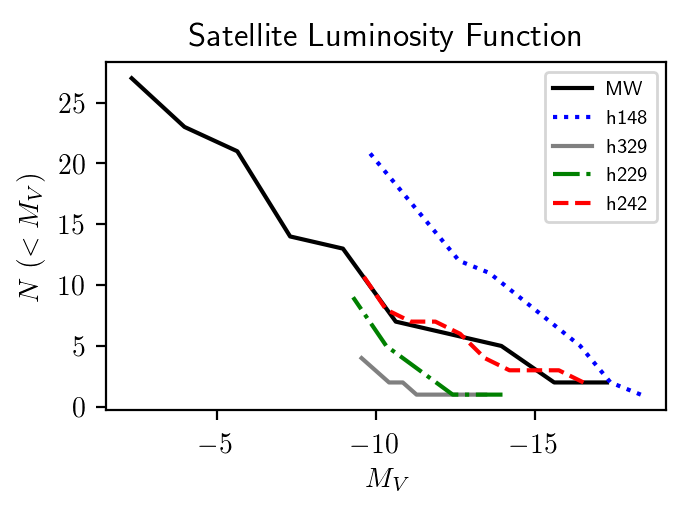

In [49]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma','Lucida Grande','Verdana', 'DejaVu Sans']
mpl.rc('text', usetex=True)


plt.figure(figsize=(4,3),dpi=200)

for maglist,name,style,color in zip([MW,h148,h329,h229,h242],['MW','h148','h329','h229','h242'],['-',':','-','-.','--'],['k','b','#808080','g','r']):
    y, binEdges = np.histogram(maglist)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    y = np.flip(y,axis=0)
    for i in range(len(y)):
        y[i] = sum(y[i:])
    y = np.flip(y,axis=0)
    
    plt.plot(bincenters,y,'-',linestyle=style,color=color,label=name)

plt.title('Satellite Luminosity Function')
plt.ylabel(r'$N\ (<M_V)$')
plt.xlabel(r'$M_V$')
plt.gca().invert_xaxis()
plt.legend(prop={'size':7})
plt.gcf().subplots_adjust(bottom=0.3)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('../Plots/sat_lum_func_full.png',dpi=300)
plt.show()

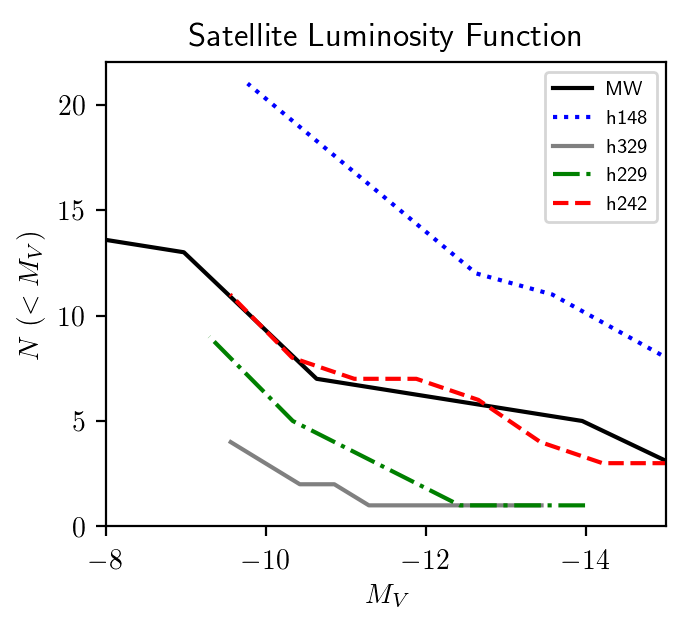

In [50]:
plt.figure(figsize=(4,4),dpi=200)

for maglist,name,style,color in zip([MW,h148,h329,h229,h242],['MW','h148','h329','h229','h242'],['-',':','-','-.','--'],['k','b','#808080','g','r']):
    y, binEdges = np.histogram(maglist)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    y = np.flip(y,axis=0)
    for i in range(len(y)):
        y[i] = sum(y[i:])
    y = np.flip(y,axis=0)
    
    plt.plot(bincenters,y,'-',linestyle=style,color=color,label=name)

plt.title('Satellite Luminosity Function')
plt.ylabel(r'$N\ (<M_V)$')
plt.xlabel(r'$M_V$')
plt.xlim(-15,-8)
plt.ylim(0,22)
plt.gca().invert_xaxis()
plt.legend(prop={'size':7})
plt.gcf().subplots_adjust(bottom=0.3)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('../Plots/sat_lum_func_zoomed.png',dpi=300)
plt.show()

# Mass Function

In [130]:
children = np.array(h[1].properties['children'])
print('Initial AHF guess, # sats:',len(children))

children = [n for n in children if not h[n].properties['n_star']==0]
print('Number of satellites with stars:',len(children))

children = [n for n in children if in_virial_radius(n)]
print('Only within Rvir of h1:',len(children))

Initial AHF guess, # sats: 3197
Number of satellites with stars: 44
Only within Rvir of h1: 42


In [43]:
import pynbody
import matplotlib.pyplot as plt
import numpy as np

pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]


simnames = ['h148','h229','h242','h329']
paths = ['../../Data3/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096',
    '../Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096',
    '../Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096',
    '../Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096']

masslists = []
for simname,path in zip(simnames,paths):
    s = pynbody.load(path)
    h = s.halos(dummy=True)
    print('Plotting sim %s with %s halos' % (simname,len(h)))
    mass = []
    for i in range(1,len(h)): 
        m = h[i].properties['mass']
        mass.append(m) # add back to magnitude list
    mass = np.array(mass,dtype='float32')
    print('Mean mass %s solar masses' % np.mean(mass))
    masslists.append(mass)

Plotting sim h148 with 13277 halos
Mean mass 89781110000.0 solar masses
Plotting sim h229 with 10041 halos
Mean mass 121069490000.0 solar masses
Plotting sim h242 with 13179 halos
Mean mass 92929500000.0 solar masses
Plotting sim h329 with 7144 halos
Mean mass 167959950000.0 solar masses


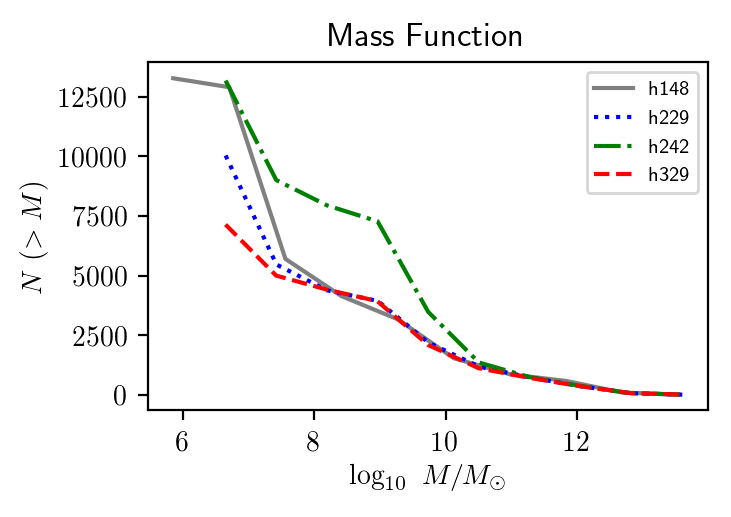

In [51]:
plt.figure(dpi=200,figsize=(4,3))

for mass,name,style,color in zip(masslists,simnames,['-',':','-.','--'],['#808080','b','g','r']):
    mass = np.log10(mass)
    y,binEdges=np.histogram(mass)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    for i in range(len(y)):
        y[i] = sum(y[i:])
    plt.plot(bincenters,y,'-',linestyle=style,color=color,label=name)

plt.title('Mass Function')
plt.ylabel(r'$N\ (>M)$')
plt.xlabel(r'$\log_{10}\ M/M_{\odot}$')
plt.legend(prop={'size':7})
plt.gcf().subplots_adjust(bottom=0.3)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('../Plots/mass_function.png',dpi=300)
plt.show()